## 1. Problem Definition
In our case, the problem we will be exploring is **regression** (predict dependent variable thanks to independent variables). 

This is because we're going to be using a number of different **features** (pieces of information) about a car to predict it's sale price

In a statement,

> Given features about a car, can we predict sale price?

## 2. Data

The original data came from the (https://www.kaggle.com/datasets/alpertemel/turkey-car-market-2020).


Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.


### Car Market in Turkiye Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

The variables in the data set are as follows:

1. İlan Tarihi: Date
2. Marka: Brand
3. Arac Tip Grubu: Vehicle Type Group
4. Arac Tip: Vehicle Type
5. Model Yıl: Model Year
6. Yakıt Turu: Fuel Type (Benzin: Petrol, Dizel: Diesel, Benzin / LPG: Gasoline, Hibrit: Hybrid, Elektrik: Electricity)

7. Vites: Transmission (Otomatik: Automatic, Yarı Otomatik: Semi Automatic, Düz: Manual)
8. CCM: CCM
9. Beygir Gucu: Horse Power
10. Renk: Color
11. Kasa Tipi: Body Type
12. Kimden: Seller
13. Durum: Seller Status
14. KM: Kilometers
15. Fiyat: Price



It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

>Important: NaN values on the data shown as;
    1. Arac Tip: "-"
    2. Beygir Gucu: "Bilmiyorum"
    3. CCM: "Bilmiyorum"

## Standart Imports

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [39]:
# Load data
df = pd.read_csv("data/turkey_car_market.csv")
df.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750


In [40]:
df.tail()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
9039,06/06/2020,Tofaş,Şahin,1.6,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,51-75 BG,Beyaz,Sedan,Galeriden,2. El,121212,12250
9040,05/06/2020,Tofaş,Şahin,Şahin 5 vites,1992.0,Benzin/LPG,Düz Vites,1301-1600 cc,76-100 BG,Bej,Sedan,Sahibinden,2. El,54000,16300
9041,05/06/2020,Tofaş,Doğan,SLX,1993.0,Benzin/LPG,Düz Vites,1301-1600 cc,76-100 BG,Yeşil,Sedan,Sahibinden,2. El,135000,19000
9042,04/06/2020,Tofaş,Kartal,Kartal 5 Vites,1991.0,Benzin/LPG,Düz Vites,1601-1800 cc,76-100 BG,Kırmızı,Hatchback 5 Kapı,Galeriden,2. El,250000,11000
9043,04/06/2020,Tofaş,Kartal,Kartal 5 Vites,1996.0,Benzin/LPG,Düz Vites,1301-1600 cc,51-75 BG,Beyaz,Sedan,Galeriden,2. El,11,15750


In [41]:
# Rows and columns count"
df.shape

(9044, 15)

In [42]:
# Quick insight to the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9044 entries, 0 to 9043
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   İlan Tarihi     9044 non-null   object 
 1   Marka           9044 non-null   object 
 2   Arac Tip Grubu  9044 non-null   object 
 3   Arac Tip        9044 non-null   object 
 4   Model Yıl       9044 non-null   float64
 5   Yakıt Turu      9044 non-null   object 
 6   Vites           9044 non-null   object 
 7   CCM             9044 non-null   object 
 8   Beygir Gucu     9044 non-null   object 
 9   Renk            9044 non-null   object 
 10  Kasa Tipi       9044 non-null   object 
 11  Kimden          9044 non-null   object 
 12  Durum           9044 non-null   object 
 13  Km              9044 non-null   int64  
 14  Fiyat           9044 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 1.0+ MB


In [43]:
# Check for duplicated data
df.duplicated().sum()

1594

In [44]:
# Remove duplicated data
df = df.drop_duplicates(keep="first")
df.duplicated().sum()

0

In [45]:
df.isna().sum()

İlan Tarihi       0
Marka             0
Arac Tip Grubu    0
Arac Tip          0
Model Yıl         0
Yakıt Turu        0
Vites             0
CCM               0
Beygir Gucu       0
Renk              0
Kasa Tipi         0
Kimden            0
Durum             0
Km                0
Fiyat             0
dtype: int64

In [46]:
df.dropna(inplace=True)

In [47]:
# Determine the NaN values on Arac Tip
df[df["Arac Tip"] == "-"].count()

İlan Tarihi       54
Marka             54
Arac Tip Grubu    54
Arac Tip          54
Model Yıl         54
Yakıt Turu        54
Vites             54
CCM               54
Beygir Gucu       54
Renk              54
Kasa Tipi         54
Kimden            54
Durum             54
Km                54
Fiyat             54
dtype: int64

### (Arac tip Grubu) much higher important than the "Arac Tip" data but we have just 54 samples and remove them is not important much

In [48]:
df = df.loc[df["Arac Tip"] != "-"]
df[df["Arac Tip"] == "-"].count()

İlan Tarihi       0
Marka             0
Arac Tip Grubu    0
Arac Tip          0
Model Yıl         0
Yakıt Turu        0
Vites             0
CCM               0
Beygir Gucu       0
Renk              0
Kasa Tipi         0
Kimden            0
Durum             0
Km                0
Fiyat             0
dtype: int64

In [49]:
# Determine how many NaN data on Beygir Gucu
df.loc[df["Beygir Gucu"] == "Bilmiyorum"]


,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
22,20/04/2020,Acura,CL,2.2,2012.0,Dizel,Düz Vites,Bilmiyorum,Bilmiyorum,Gümüş Gri,Arazi Aracı,Galeriden,2. El,270,82500
44,21/03/2020,Acura,TL,Diğer,2016.0,Dizel,Düz Vites,Bilmiyorum,Bilmiyorum,Beyaz,Sedan,Sahibinden,2. El,172000,92000
51,12/05/2020,Alfa Romeo,Giulietta,1.6 JTD Super TCT,2018.0,Dizel,Otomatik Vites,1301-1600 cc,Bilmiyorum,Füme,Hatchback 5 Kapı,Galeriden,2. El,32000,178750
53,18/04/2020,Alfa Romeo,Diğer,Diğer,2013.0,Dizel,Düz Vites,1300 cc ve altı,Bilmiyorum,Kırmızı,Hatchback 3 Kapı,Galeriden,2. El,182000,72950
54,18/04/2020,Alfa Romeo,Diğer,Diğer,2013.0,Benzin,Yarı Otomatik Vites,1301-1600 cc,Bilmiyorum,Mavi,Hatchback 3 Kapı,Galeriden,2. El,99000,105900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8972,17/04/2020,Skoda,Octavia,Diğer,2016.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,Bilmiyorum,Siyah,Hatchback 5 Kapı,Galeriden,2. El,127815,139999
8973,17/04/2020,Skoda,Octavia,Diğer,2016.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,Bilmiyorum,Beyaz,Hatchback 5 Kapı,Galeriden,2. El,66000,139850
8974,17/04/2020,Skoda,Octavia,Diğer,2016.0,Dizel,Otomatik Vites,1300 cc ve altı,Bilmiyorum,Siyah,Sedan,Galeriden,2. El,109000,124950
9004,14/06/2020,Tofaş,Şahin,1.4,1999.0,Benzin/LPG,Düz Vites,Bilmiyorum,Bilmiyorum,Beyaz,Sedan,Sahibinden,2. El,51000,23500


In [50]:
# Determine how many NaN data on CCM
df.loc[df["CCM"] == "Bilmiyorum"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 22 to 9022
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   İlan Tarihi     106 non-null    object 
 1   Marka           106 non-null    object 
 2   Arac Tip Grubu  106 non-null    object 
 3   Arac Tip        106 non-null    object 
 4   Model Yıl       106 non-null    float64
 5   Yakıt Turu      106 non-null    object 
 6   Vites           106 non-null    object 
 7   CCM             106 non-null    object 
 8   Beygir Gucu     106 non-null    object 
 9   Renk            106 non-null    object 
 10  Kasa Tipi       106 non-null    object 
 11  Kimden          106 non-null    object 
 12  Durum           106 non-null    object 
 13  Km              106 non-null    int64  
 14  Fiyat           106 non-null    int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 13.2+ KB


### As we can see above there are 4477 rows which contains NaN Beygir Gucu data and 42 rows which contains NaN CCM data, it's much but in this point we have already enough data, maybe later we can deal with those.
    **I believe it might be a good idea to convert to numerical and use mean to same Marka.

    **Secondly, we can check heatmap maybe we can find a high corelation with CCM and no need Beygir Gucu.

    **Or we can fill mising values with hands.

In [51]:
# Let's check how many data left
df = df.loc[df["Beygir Gucu"] != ("Bilmiyorum")]
df = df.loc[df["CCM"] != "Bilmiyorum"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877 entries, 0 to 9043
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   İlan Tarihi     2877 non-null   object 
 1   Marka           2877 non-null   object 
 2   Arac Tip Grubu  2877 non-null   object 
 3   Arac Tip        2877 non-null   object 
 4   Model Yıl       2877 non-null   float64
 5   Yakıt Turu      2877 non-null   object 
 6   Vites           2877 non-null   object 
 7   CCM             2877 non-null   object 
 8   Beygir Gucu     2877 non-null   object 
 9   Renk            2877 non-null   object 
 10  Kasa Tipi       2877 non-null   object 
 11  Kimden          2877 non-null   object 
 12  Durum           2877 non-null   object 
 13  Km              2877 non-null   int64  
 14  Fiyat           2877 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 359.6+ KB


In [52]:
# Check for Na values
df.isna().sum()

İlan Tarihi       0
Marka             0
Arac Tip Grubu    0
Arac Tip          0
Model Yıl         0
Yakıt Turu        0
Vites             0
CCM               0
Beygir Gucu       0
Renk              0
Kasa Tipi         0
Kimden            0
Durum             0
Km                0
Fiyat             0
dtype: int64

In [53]:
df = df.dropna()
df.isna().sum()

İlan Tarihi       0
Marka             0
Arac Tip Grubu    0
Arac Tip          0
Model Yıl         0
Yakıt Turu        0
Vites             0
CCM               0
Beygir Gucu       0
Renk              0
Kasa Tipi         0
Kimden            0
Durum             0
Km                0
Fiyat             0
dtype: int64

In [54]:
# Popular 10 marka
marka_counts=df['Marka'].value_counts()
popular = marka_counts[:10]
popular

Renault     485
Opel        331
Fiat        306
Ford        273
Hyundai     255
Peugeot     148
Honda       140
BMW         120
Mercedes    114
Audi         85
Name: Marka, dtype: int64

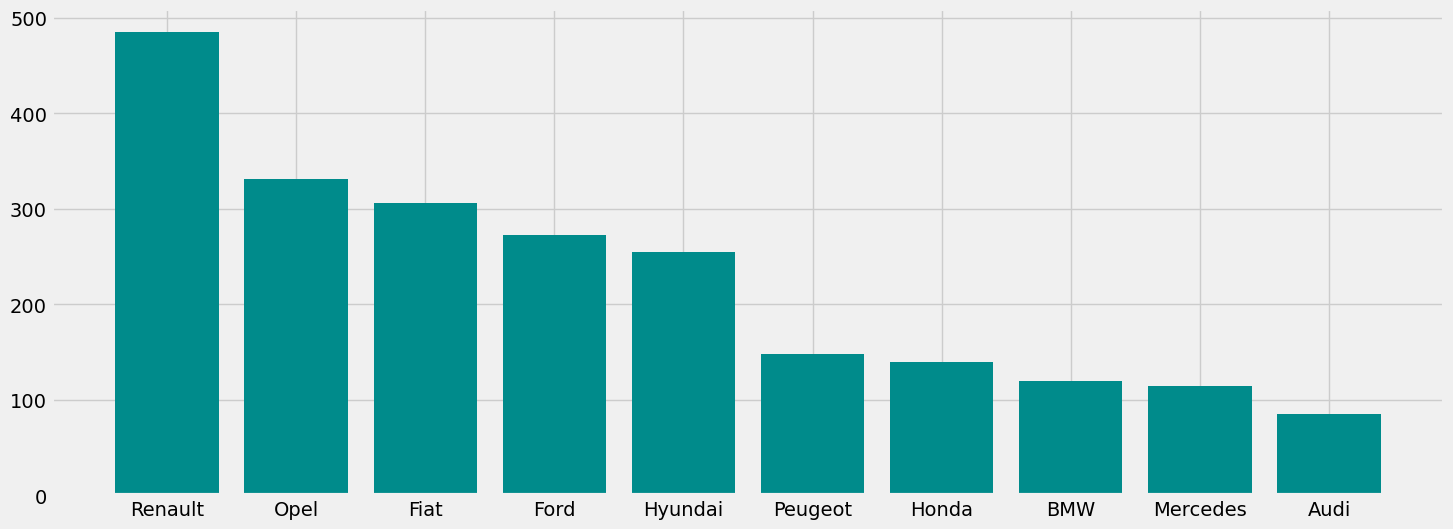

In [55]:
# Plot the Marka counts with a bar graph
plt.figure(figsize=(16,6))
plt.style.use("fivethirtyeight")
plt.grid(True, color="#ccc")
plt.bar(popular.index, popular.values, color="darkcyan");

In [56]:
df = df.drop("İlan Tarihi", axis=1)
df

,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
2,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
4,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750
5,Acura,CL,2.2,1999.0,Dizel,Düz Vites,1801-2000 cc,101-125 BG,Lacivert,Roadster,Galeriden,2. El,320000,42500
6,Acura,CL,2.2,2014.0,Dizel,Otomatik Vites,1301-1600 cc,101-125 BG,Kırmızı,Sedan,Galeriden,2. El,183,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9039,Tofaş,Şahin,1.6,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,51-75 BG,Beyaz,Sedan,Galeriden,2. El,121212,12250
9040,Tofaş,Şahin,Şahin 5 vites,1992.0,Benzin/LPG,Düz Vites,1301-1600 cc,76-100 BG,Bej,Sedan,Sahibinden,2. El,54000,16300
9041,Tofaş,Doğan,SLX,1993.0,Benzin/LPG,Düz Vites,1301-1600 cc,76-100 BG,Yeşil,Sedan,Sahibinden,2. El,135000,19000
9042,Tofaş,Kartal,Kartal 5 Vites,1991.0,Benzin/LPG,Düz Vites,1601-1800 cc,76-100 BG,Kırmızı,Hatchback 5 Kapı,Galeriden,2. El,250000,11000


### Now we'll be dealing with CCM and Beygir Gucu, we will convert them to numeric and take the start value

In [57]:
# We will use regex 
import re
df

,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
2,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
4,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750
5,Acura,CL,2.2,1999.0,Dizel,Düz Vites,1801-2000 cc,101-125 BG,Lacivert,Roadster,Galeriden,2. El,320000,42500
6,Acura,CL,2.2,2014.0,Dizel,Otomatik Vites,1301-1600 cc,101-125 BG,Kırmızı,Sedan,Galeriden,2. El,183,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9039,Tofaş,Şahin,1.6,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,51-75 BG,Beyaz,Sedan,Galeriden,2. El,121212,12250
9040,Tofaş,Şahin,Şahin 5 vites,1992.0,Benzin/LPG,Düz Vites,1301-1600 cc,76-100 BG,Bej,Sedan,Sahibinden,2. El,54000,16300
9041,Tofaş,Doğan,SLX,1993.0,Benzin/LPG,Düz Vites,1301-1600 cc,76-100 BG,Yeşil,Sedan,Sahibinden,2. El,135000,19000
9042,Tofaş,Kartal,Kartal 5 Vites,1991.0,Benzin/LPG,Düz Vites,1601-1800 cc,76-100 BG,Kırmızı,Hatchback 5 Kapı,Galeriden,2. El,250000,11000


In [58]:
df["CCM"] = df["CCM"].str.extract(r'([a-zA-Z0-9@.]+)')
df["CCM"]

0       1801
2       1301
4       1801
5       1801
6       1301
        ... 
9039    1301
9040    1301
9041    1301
9042    1601
9043    1301
Name: CCM, Length: 2877, dtype: object

In [59]:
df["Beygir Gucu"] = df["Beygir Gucu"].str.extract(r'([a-zA-Z0-9@.]+)')
df["Beygir Gucu"]

0       176
2       101
4       151
5       101
6       101
       ... 
9039     51
9040     76
9041     76
9042     76
9043     51
Name: Beygir Gucu, Length: 2877, dtype: object

In [60]:
df.head()

,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801,176,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
2,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301,101,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
4,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801,151,Beyaz,Sedan,Sahibinden,2. El,207000,148750
5,Acura,CL,2.2,1999.0,Dizel,Düz Vites,1801,101,Lacivert,Roadster,Galeriden,2. El,320000,42500
6,Acura,CL,2.2,2014.0,Dizel,Otomatik Vites,1301,101,Kırmızı,Sedan,Galeriden,2. El,183,170000


#### Now let's change column dtypes to int

In [61]:
# We have 2 Na values..
df.isna().sum()

Marka             0
Arac Tip Grubu    0
Arac Tip          0
Model Yıl         0
Yakıt Turu        0
Vites             0
CCM               1
Beygir Gucu       1
Renk              0
Kasa Tipi         0
Kimden            0
Durum             0
Km                0
Fiyat             0
dtype: int64

In [62]:
df.dropna(inplace=True)

In [63]:
df["CCM"] = df["CCM"].astype(int)
df["Beygir Gucu"] = df["Beygir Gucu"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2876 entries, 0 to 9043
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marka           2876 non-null   object 
 1   Arac Tip Grubu  2876 non-null   object 
 2   Arac Tip        2876 non-null   object 
 3   Model Yıl       2876 non-null   float64
 4   Yakıt Turu      2876 non-null   object 
 5   Vites           2876 non-null   object 
 6   CCM             2876 non-null   int64  
 7   Beygir Gucu     2876 non-null   int64  
 8   Renk            2876 non-null   object 
 9   Kasa Tipi       2876 non-null   object 
 10  Kimden          2876 non-null   object 
 11  Durum           2876 non-null   object 
 12  Km              2876 non-null   int64  
 13  Fiyat           2876 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 337.0+ KB


### We look at the correlation between Model Yıl, CCM, Beygir Gucu, KM and Fiyat


In [64]:
# Find the correleation between our independent variables
corr_matrix = df.corr()
corr_matrix

/tmp/ipykernel_3744/3047276580.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Model Yıl,CCM,Beygir Gucu,Km,Fiyat
Model Yıl,1.000000,-0.168695,0.131646,-0.393589,0.338376
CCM,-0.168695,1.000000,0.585232,0.156643,0.174007
Beygir Gucu,0.131646,0.585232,1.000000,0.047694,0.387988
Km,-0.393589,0.156643,0.047694,1.000000,-0.192235
Fiyat,0.338376,0.174007,0.387988,-0.192235,1.000000


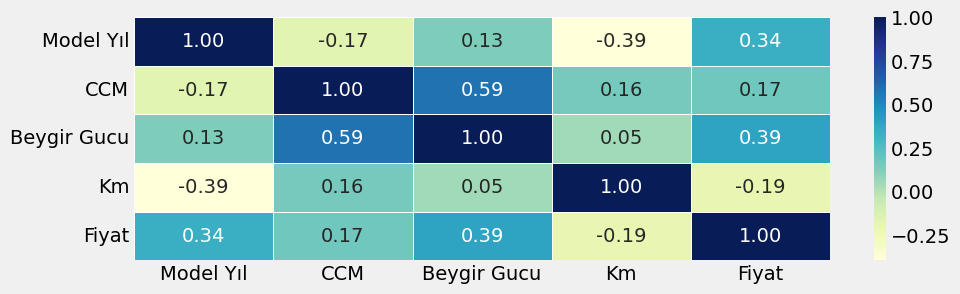

In [74]:
# Let's make it look a little prettier
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 3))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu");

### As we can see above there is a high corelation between Beygir Gucu and CCM


In [80]:
# Save our DataFrame
new_df = df.to_csv("new_df.csv")